## Prerequisites:

1. `lalsuite`'s ESIGMA branch should be installed (and sourced!) $\rightarrow$ required for the inspiral piece.
2. `NRSur7dq4`'s [data file](https://git.ligo.org/lscsoft/lalsuite-extra/-/blob/master/data/lalsimulation/NRSur7dq4.h5) should be downloaded, with the path to the directory containing it been set to the bash environment variable `LAL_DATA_PATH` $\rightarrow$ required for the merger-ringdown piece.

The detailed instructions to set these up are present on the [git repository](https://github.com/gwnrtools/esigmapy).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import esigmapy

# Configuring some plot settings
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
    "font.size": 12
    })

No version information file '.version' found


## IMRESIGMA

### Wavefrom polarizations
The polarizations $h_+$ and $h_\times$ can be generated via the `get_imr_esigma_waveform` function. They are returned as `PyCBC` `TimeSeries` objects.

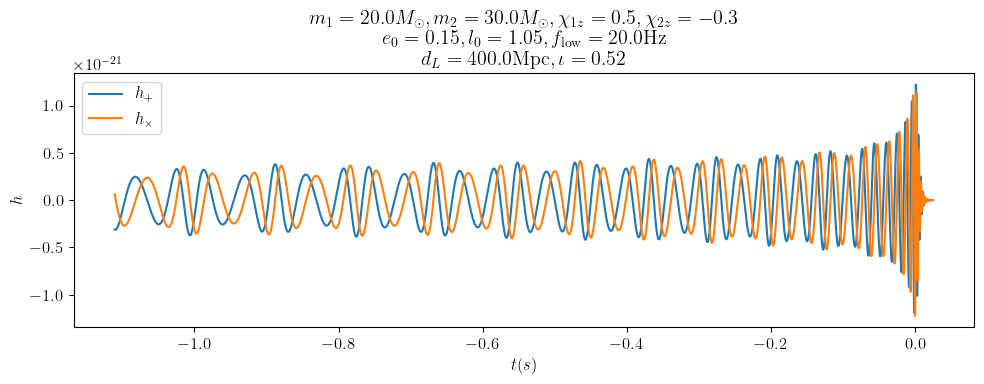

In [2]:
m1 = 20. # masses (in solar masses) 
m2 = 30.
spin1z = 0.5 # dimensionless spins
spin2z = -0.3
eccentricity = 0.15 # starting eccentricity
mean_anomaly = 60 * np.pi/180. # starting mean anomaly
modes_to_use = [(2,2), (2,-2)] # Only using the (2,2) mode 

distance = 400. # source luminosity distance (in Mpc)
inclination = 30 * np.pi/180. # orbital inclination with line-of-sight

f_low = 20. # starting frequency (in Hz)
delta_t = 1/2**12 # time grid-spacing (in s)

hp, hc = esigmapy.get_imr_esigma_waveform(mass1=m1, 
                                        mass2=m2,
                                        spin1z=spin1z, 
                                        spin2z=spin2z,
                                        eccentricity=eccentricity,
                                        mean_anomaly=mean_anomaly,
                                        distance=distance,
                                        inclination=inclination,
                                        f_lower=f_low,
                                        delta_t=delta_t,
                                        modes_to_use=modes_to_use)

plt.figure(figsize=(10,4))
plt.title(fr"""$m_1={m1} M_\odot, m_2={m2} M_\odot, \chi_{{1z}}={spin1z}, \chi_{{2z}}={spin2z}$ 
          $e_0={eccentricity}, l_0={mean_anomaly:.2f}, f_{{\rm{{low}}}}={f_low}\rm{{Hz}}$
          $d_L={distance}\rm{{Mpc}}, \iota={inclination:.2f}$""")
hp.plot(label=r"$h_+$")
hc.plot(label=r"$h_\times$")
plt.xlabel(r"$t (s)$")
plt.ylabel(r"$h$")
plt.legend()
plt.tight_layout()

One can also specify the eccentricity and mean anomaly at some reference frequency $f_\rm{ref}$ different from the starting frequency $f_{\rm{low}}$ of the waveform. However, currently we only support $f_{\rm{ref}} \leq f_{\rm{low}}$.

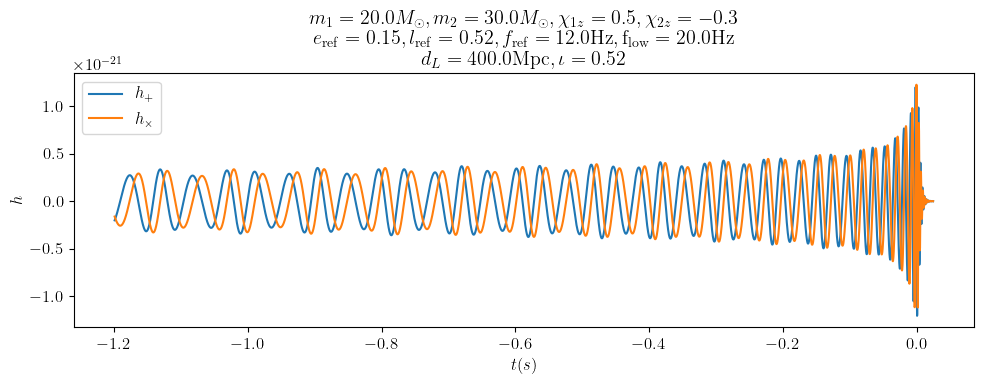

In [3]:
f_ref = 12.
f_low = 20.

# This time, the following eccentricity and mean anomaly values are
# defined at f_ref, and not at f_low
eccentricity = 0.15
mean_anomaly = 30. * np.pi/180.

hp, hc = esigmapy.get_imr_esigma_waveform(mass1=m1, 
                                        mass2=m2,
                                        spin1z=spin1z, 
                                        spin2z=spin2z,
                                        eccentricity=eccentricity,
                                        mean_anomaly=mean_anomaly,
                                        distance=distance,
                                        inclination=inclination,
                                        f_ref=f_ref,
                                        f_lower=f_low,
                                        delta_t=delta_t,
                                        modes_to_use=modes_to_use)

plt.figure(figsize=(10,4))
plt.title(fr"""$m_1={m1} M_\odot, m_2={m2} M_\odot, \chi_{{1z}}={spin1z}, \chi_{{2z}}={spin2z}$ 
          $e_{{\rm{{ref}}}}={eccentricity}, l_{{\rm{{ref}}}}={mean_anomaly:.2f}, f_{{\rm{{ref}}}}={f_ref}\rm{{Hz}}, f_{{\rm{{low}}}}={f_low}\rm{{Hz}}$
          $d_L={distance}\rm{{Mpc}}, \iota={inclination:.2f}$""")
hp.plot(label=r"$h_+$")
hc.plot(label=r"$h_\times$")
plt.xlabel(r"$t (s)$")
plt.ylabel(r"$h$")
plt.legend()
plt.tight_layout()

### Waveform modes
One can also generate the spin-weighted spherical harmonic modes via the `get_imr_esigma_modes` function.

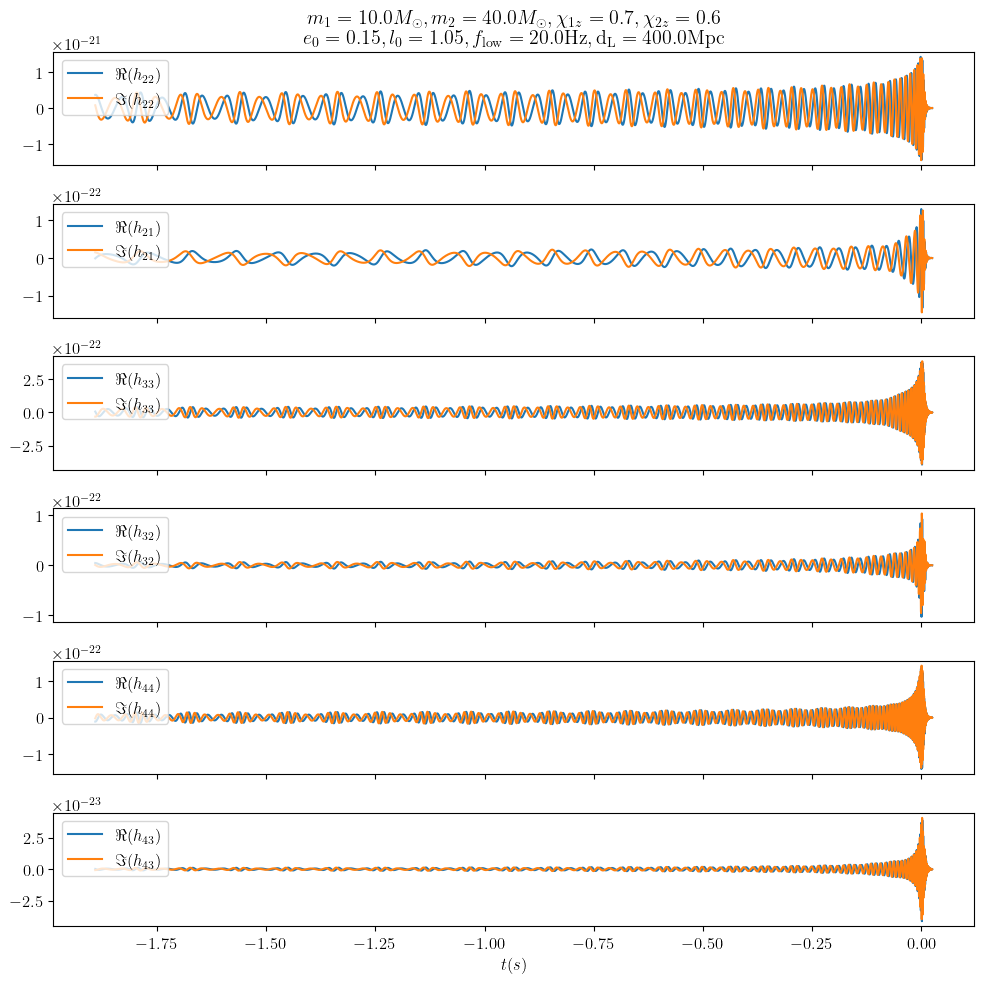

In [4]:
m1 = 10. # masses (in solar masses) 
m2 = 40.
spin1z = 0.7 # dimensionless spins
spin2z = 0.6
eccentricity = 0.15 # starting eccentricity
mean_anomaly = 60 * np.pi/180. # starting mean anomaly

distance = 400. # source luminosity distance (in Mpc)
inclination = 30 * np.pi/180. # orbital inclination with line-of-sight

f_low = 20. # starting frequency (in Hz)
delta_t = 1/2**12 # time grid-spacing (in s)

modes_to_use=[(2,2), (2,1), (3,3), (3,2), (4,4), (4,3)]

modes = esigmapy.get_imr_esigma_modes(mass1=m1, 
                                    mass2=m2,
                                    spin1z=spin1z, 
                                    spin2z=spin2z,
                                    eccentricity=eccentricity,
                                    mean_anomaly=mean_anomaly,
                                    distance=distance,
                                    f_lower=f_low,
                                    delta_t=delta_t,
                                    modes_to_use=modes_to_use,
                                    include_conjugate_modes=False)

fig, axs = plt.subplots(len(modes_to_use), sharex=True, figsize=(10, 10))
axs[0].set_title(fr"""$m_1={m1} M_\odot, m_2={m2} M_\odot, \chi_{{1z}}={spin1z}, \chi_{{2z}}={spin2z}$ 
          $e_0={eccentricity}, l_0={mean_anomaly:.2f}, f_{{\rm{{low}}}}={f_low}\rm{{Hz}}, d_L={distance}\rm{{Mpc}}$""")
for i, mode_name in enumerate(modes_to_use):
    ell, m = mode_name
    axs[i].plot(modes[mode_name].sample_times.data, modes[mode_name].real().data, label=rf"$\Re(h_{{{ell} {m}}})$")
    axs[i].plot(modes[mode_name].sample_times.data, modes[mode_name].imag().data, label=rf"$\Im(h_{{{ell} {m}}})$")
    axs[i].legend(loc=2)
plt.xlabel(r"$t (s)$")
plt.tight_layout()

Other options related to hybridization settings, merger-ringdown model choice, etc. are available as well. One can check them in the respective docstrings of the functions like so:

In [5]:
help(esigmapy.get_imr_esigma_waveform)

Help on function get_imr_esigma_waveform in module esigmapy.generator:

get_imr_esigma_waveform(mass1, mass2, f_lower, delta_t, f_ref=None, spin1z=0.0, spin2z=0.0, eccentricity=0.0, mean_anomaly=0.0, coa_phase=0.0, inclination=0.0, distance=1.0, modes_to_use=[(2, 2), (3, 3), (4, 4)], mode_to_align_by=(2, 2), f_mr_transition=None, f_window_mr_transition=None, num_hyb_orbits=0.25, blend_using_avg_orbital_frequency=True, blend_aligning_merger_to_inspiral=True, keep_f_mr_transition_at_center=False, merger_ringdown_approximant='NRSur7dq4', return_hybridization_info=False, return_orbital_params=False, failsafe=True, verbose=False, **kwargs)
    Returns IMR GW polarizations constructed using IMR ESIGMA modes
    
    Parameters:
    -----------
        mass1, mass2              -- Binary's component masses (in solar masses)
        f_lower                   -- Starting frequency of the waveform (in Hz)
        f_ref                     -- Reference frequency at which to define the
           

## InspiralESIGMA

One can also generate the inspiral-only wavefroms and modes via the `get_inspiral_esigma_waveform` and `get_inspiral_esigma_modes` functions respectively. Unlike the full IMR waveform which uses a quasi-circular merger-ringdown model and thus forbids using large starting eccentricities, the inspiral waveforms can be generated for arbitrarily eccentric (bounded) orbits (i.e. with $0 \leq e < 1$).

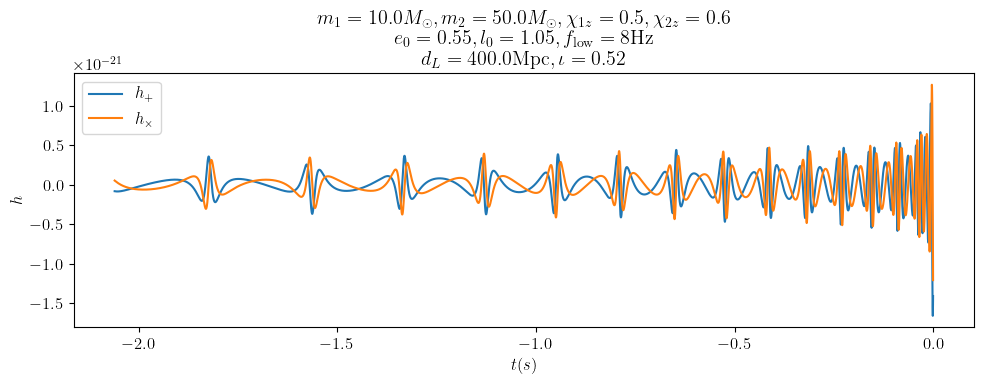

In [6]:
m1 = 10. # masses (in solar masses) 
m2 = 50.
spin1z = 0.5 # dimensionless spins
spin2z = 0.6
eccentricity = 0.55 # starting eccentricity
mean_anomaly = 60 * np.pi/180. # starting mean anomaly
modes_to_use = [(2,2), (2,-2)] # Only using the (2,2) mode 

distance = 400. # source luminosity distance (in Mpc)
inclination = 30 * np.pi/180. # orbital inclination with line-of-sight

f_low = 8 # starting frequency (in Hz)
delta_t = 1/2**12 # time grid-spacing (in s)

hp, hc = esigmapy.get_inspiral_esigma_waveform(mass1=m1, 
                                            mass2=m2,
                                            spin1z=spin1z, 
                                            spin2z=spin2z,
                                            eccentricity=eccentricity,
                                            mean_anomaly=mean_anomaly,
                                            distance=distance,
                                            inclination=inclination,
                                            f_lower=f_low,
                                            delta_t=delta_t,
                                            modes_to_use=modes_to_use
                                                )
plt.figure(figsize=(10,4))
plt.title(fr"""$m_1={m1} M_\odot, m_2={m2} M_\odot, \chi_{{1z}}={spin1z}, \chi_{{2z}}={spin2z}$ 
          $e_0={eccentricity}, l_0={mean_anomaly:.2f}, f_{{\rm{{low}}}}={f_low}\rm{{Hz}}$
          $d_L={distance}\rm{{Mpc}}, \iota={inclination:.2f}$""")
hp.plot(label=r"$h_+$")
hc.plot(label=r"$h_\times$")
plt.xlabel(r"$t (s)$")
plt.ylabel(r"$h$")
plt.legend()
plt.tight_layout()

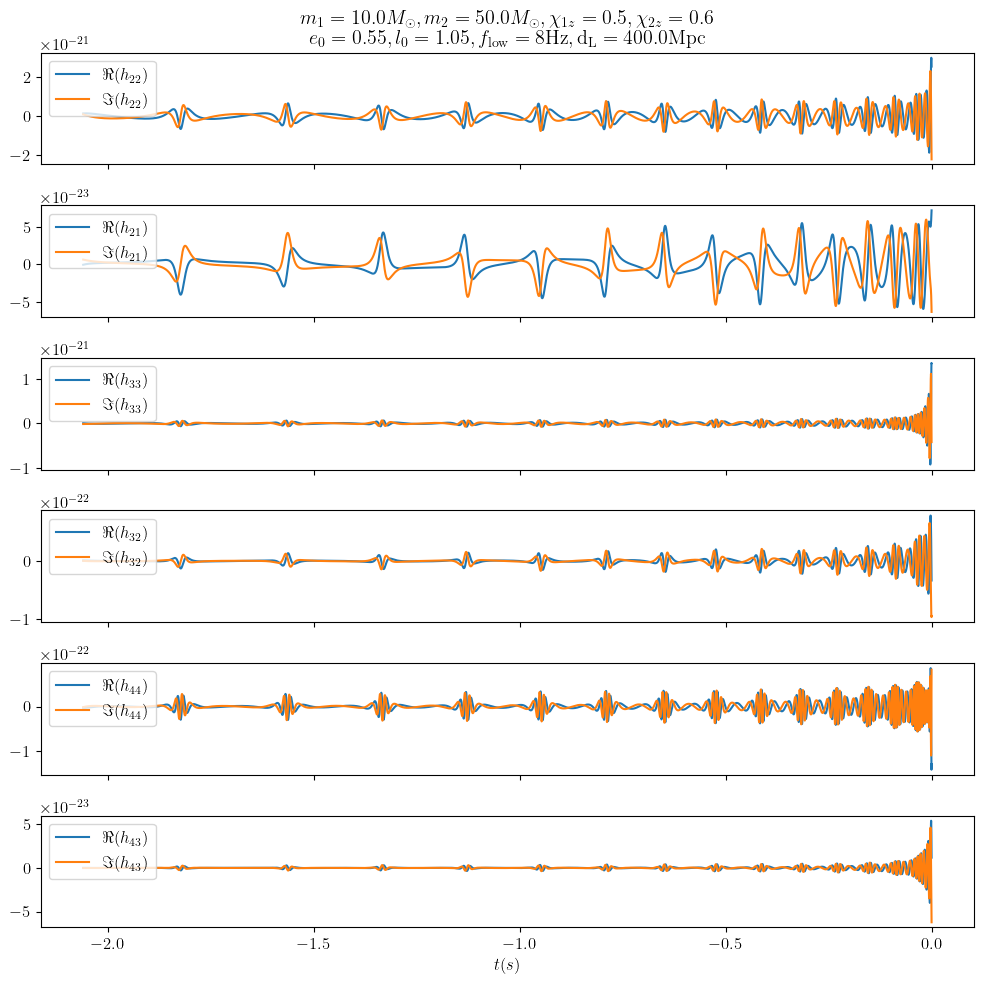

In [7]:
modes_to_use=[(2,2), (2,1), (3,3), (3,2), (4,4), (4,3)]

modes = esigmapy.get_inspiral_esigma_modes(mass1=m1, 
                                        mass2=m2,
                                        spin1z=spin1z, 
                                        spin2z=spin2z,
                                        eccentricity=eccentricity,
                                        mean_anomaly=mean_anomaly,
                                        distance=distance,
                                        f_lower=f_low,
                                        delta_t=delta_t,
                                        modes_to_use=modes_to_use,
                                        include_conjugate_modes=False)

fig, axs = plt.subplots(len(modes_to_use), sharex=True, figsize=(10, 10))
axs[0].set_title(fr"""$m_1={m1} M_\odot, m_2={m2} M_\odot, \chi_{{1z}}={spin1z}, \chi_{{2z}}={spin2z}$ 
          $e_0={eccentricity}, l_0={mean_anomaly:.2f}, f_{{\rm{{low}}}}={f_low}\rm{{Hz}}, d_L={distance}\rm{{Mpc}}$""")
for i, mode_name in enumerate(modes_to_use):
    ell, m = mode_name
    axs[i].plot(modes[mode_name].sample_times.data, modes[mode_name].real().data, label=rf"$\Re(h_{{{ell} {m}}})$")
    axs[i].plot(modes[mode_name].sample_times.data, modes[mode_name].imag().data, label=rf"$\Im(h_{{{ell} {m}}})$")
    axs[i].legend(loc=2)
plt.xlabel(r"$t (s)$")
plt.tight_layout()

## Evolution of orbital elements
The evolution of binary's orbital elements can also be accessed, but only for the *inspiral part of the dynamics*. These can be accessed via the argument `return_orbital_params` in all of the above discussed waveform/mode functions. The available orbital elements are

- $x$: The post-Newtonian (PN) parameter. It's related to the orbit-averaged (azimuthal) orbital frequency
- $e$: Orbital eccentricity
- $l$: Mean anomaly
- $r$: Relative separation
- $\dot{r}$: Radial velocity
- $\phi$: Orbital phase
- $\dot{\phi}$: Angular velocity

All of these are returned in geometric units ($G=c=1$).

Text(0.5, 0, '$t (s)$')

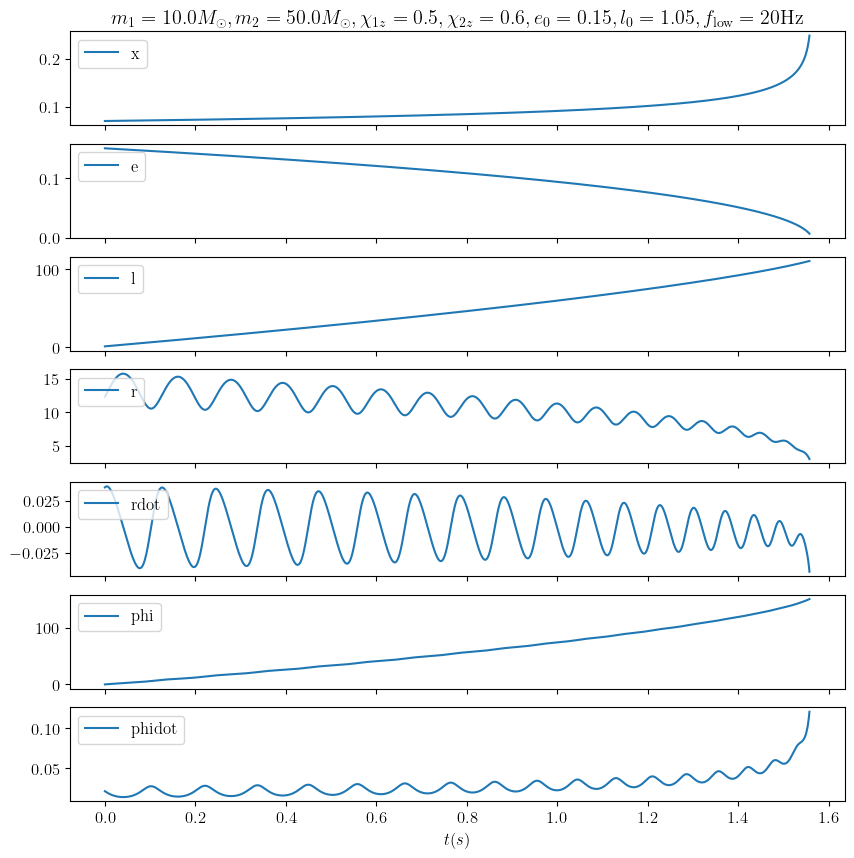

In [8]:
m1 = 10. # masses (in solar masses) 
m2 = 50.
spin1z = 0.5 # dimensionless spins
spin2z = 0.6
eccentricity = 0.15 # starting eccentricity
mean_anomaly = 60 * np.pi/180. # starting mean anomaly
modes_to_use = [(2,2), (2,-2)] # Only using the (2,2) mode 
orb_params_list = ['x', 'e', 'l', 'r', 'rdot', 'phi', 'phidot' ]

distance = 400. # source luminosity distance (in Mpc)
inclination = 30 * np.pi/180. # orbital inclination with line-of-sight

f_low = 20 # starting frequency (in Hz)
delta_t = 1/2**12 # time grid-spacing (in s)

orb_vars, hp, hc = esigmapy.get_inspiral_esigma_waveform(mass1=m1, 
                                                        mass2=m2,
                                                        spin1z=spin1z, 
                                                        spin2z=spin2z,
                                                        eccentricity=eccentricity,
                                                        mean_anomaly=mean_anomaly,
                                                        distance=distance,
                                                        inclination=inclination,
                                                        f_lower=f_low,
                                                        delta_t=delta_t,
                                                        modes_to_use=modes_to_use,
                                                        return_orbital_params=orb_params_list)

fig, axs = plt.subplots(len(orb_params_list), sharex=True, figsize=(10, 10))
axs[0].set_title(fr"$m_1={m1} M_\odot, m_2={m2} M_\odot, \chi_{{1z}}={spin1z}, \chi_{{2z}}={spin2z}, e_0={eccentricity}, l_0={mean_anomaly:.2f}, f_{{\rm{{low}}}}={f_low}\rm{{Hz}}$")
for i, orb_params_name in enumerate(orb_params_list):
    axs[i].plot(orb_vars[orb_params_name].sample_times.data, orb_vars[orb_params_name].data, label=rf"{orb_params_name}")
    axs[i].legend(loc=2)
plt.xlabel(r"$t (s)$")